In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# slicing, broadcasting, views and dtypes in numpy

We are going to review slicing with numpy arrays and how images are stored. Remember, a grayscale image is a 2D array like:

```
np.array([[1, 2, 3, 4],
          [5, 6, 7, 8]])
```

The size of this image would be 2 pixels high and 4 pixels wide. The numpy shape of this image is `(2, 4)`.

Color images are stored as 3 "channels", with such a 2D array. These channels are red, green and blue, and correspond to the wavelength sensitivity of cameras and to the display wavelengths of computer monitors and projectors. The channel is stored as the third and final dimension and thus the shape is `(height, width, n_channels)`. For most color images such as JPEGs, these are stored as RGB images, `n_channels` is 3, and the channels are ordered red, green and blue.

Let's consider this array:

```
im = np.zeros((100, 200, 3))
```

This array is 200 pixels width 100 pixels high (shape `(100, 200, 3)`), all zeros.

## slicing

Now let's use *slicing* to set all pixels in the red channel to have a single value of 255.

```
im[:,:,0] = 255 # set the red channel to have value 255
```

## broadcasting

This is called *broadcasting* because the single value was "broadcast" - expanded - to the shape of the array.

We can also set all pixels in a channel to from another array. For example, let's create a new array of shape `(100, 200)` and then use this to set a particular color channel:

```
new_channel = np.ones((100,200))
im[:,:,1] = new_channel
```

This will set the green channel to have value 1.

## views

In addition to using slicing to set values in an array, we can also use slicing to get a *view* of the array:

```
blue_channel = im[:,:,2]
```

Now, `blue_channel` has shape `(100, 200)` and is a view of the memory in `im`. It acts like a 2D array (instead of a 3D array) but does not have its own data and instead references the data in the `im` array.

## dtype

The last step of our mini-review is the concept of data types, or dtypes. Remember that numpy arrays are collections of identical types. For images, we most often use the `uint8` type, or unsigned 8 bit integers, which can have a value from 0 to 255. (From zero to 2^8-1.) Sometimes, we want to do math with higher precision, and thus we can convert the data to a floating point type, such as `float64`, a 64 bit floating point number:

```
im_float = im.astype(np.float64)
```

So, for example you could average together two `uint8` arrays of the same size by doing this:

```
result_float = (im_a.astype(np.float64) + im_b.astype(np.float64)) / 2.0
```

You may want to convert this average array back to `uint8`, which would be done like so:

```
result = result_float.astype(np.uint8)
```

# Colorblind simulator

We are now going to use numpy operations on an image to create a very basic "colorblind simulator". First, let's load an image. We can use any image, but here we load a image from Ishihara's test for color deficiency.

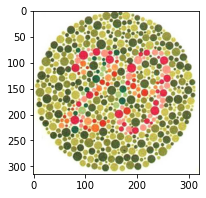

In [2]:
im_rgb = imageio.imread('Ishihara_Plate_3.jpg')
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(4,3))
ax.imshow(im_rgb);

## Q1. The task

Now, make a simple simulatation of deuteranopia (red-green color blindness) by averaging together the red and green channels.

1. Create a view of the red channel, convert it to float
2. Create a view of the green channel, convert it to float
3. Add the elements of float dtype arrays together and divide by two to create an average of the two channels.
4. Convert your average back to uint8
5. Create a new image which is a copy of your original image.
5. Set the red and green channels in your new image to the average red-green image.
6. Save the result in an array called `colorblind_simulated_image`.

In [3]:
imf = im_rgb.astype(np.float64)
r = imf[:,:,0];
g = imf[:,:,1];
newim = im_rgb.astype(np.float64)
rg = (r + g)*0.5
newim[:,:,0] = rg
newim[:,:,1] = rg
colorblind_simulated_image = newim.astype(np.uint8)

In [4]:
# If this runs without error, it means the answer in your previous cell was correct.
assert(np.allclose(colorblind_simulated_image[:,:,0], colorblind_simulated_image[:,:,1]))
for i in np.arange(0,im_rgb.shape[0],50):
    for j in np.arange(0,im_rgb.shape[1],50):
        assert(colorblind_simulated_image[i,j,0]==int((im_rgb[i,j,0].astype(np.float64)+im_rgb[i,j,1].astype(np.float64))*0.5))

## Q2. Display your image

Now use `imshow()` from matplotlib to view your image.

Your result should look like the right panel here:

![side-by-side.png](side-by-side.png)

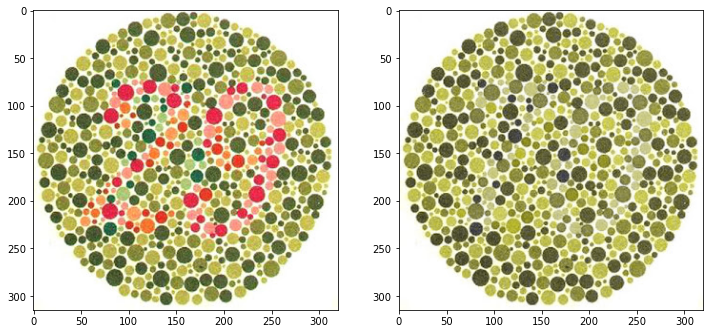

In [5]:
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(12,10))
ax[0].imshow(im_rgb);
ax[1].imshow(colorblind_simulated_image);
#plt.savefig('side-by-side.png')